# Baseline solution using Random Forrest

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
import cost_function
# Load datasets
group_dictionary = pd.read_csv('data/group_dictionary.csv', sep=';')
column_names_dictionary = pd.read_csv('data/column_names_dictionary.csv', sep=';')
test_data_no_target = pd.read_csv('data/test_data_no_target.csv', sep=';', decimal=',')
training_data = pd.read_csv('data/training_data.csv', sep=';', decimal=',')

In [19]:

# Display datasets for verification
display(group_dictionary)
display(column_names_dictionary)
display(test_data_no_target)
display(training_data)

,CODE,NUM,SECTOR
0,G1,1,Financials
1,G2,2,Industrials
2,G3,3,Energy
3,G4,4,Information Technology
4,G5,5,Consumer Staples
5,G6,6,Health Care
6,G7,7,Utilities
7,G8,8,Materials
8,G9,9,Consumer Discretionary
9,G10,10,Real Estate


,CODE,INDEX,INDICATOR NAME
0,Group,1,Industry sector
1,I1,2,"Return on Average Total Assets - %, TTM"
2,I2,3,"Return on Average Common Equity - %, TTM"
3,I3,4,"EBITDA Percentage of Common Equity, TTM"
4,I4,5,"EBITDA Percentage of Total Fixed Assets - Net,..."
...,...,...,...
112,dI54,113,1-year Absolute Change of Total Liabilities Pe...
113,dI55,114,1-year Absolute Change of Long Term Debt Perce...
114,dI56,115,1-year Absolute Change of Book Value Percentag...
115,dI57,116,1-year Absolute Change of Cash Flow from Opera...


,Group,I1,I2,I3,I4,I5,I6,I7,I8,I9,...,dI49,dI50,dI51,dI52,dI53,dI54,dI55,dI56,dI57,dI58
0,G3,0.039284,-0.034382,-0.040373,0.090023,-0.055953,0.049229,0.016236,-0.045865,0.692039,...,-0.377892,-0.410908,-0.417438,-0.220481,0.002526,0.124543,-0.219341,0.148324,0.020379,-0.004969
1,G9,-0.491713,-0.039484,-0.043612,-0.320312,0.065520,-0.216314,-0.366573,-0.052790,-0.370449,...,0.553799,0.660505,0.806000,0.781506,-0.012519,-0.014169,0.669341,0.015033,0.023411,0.007037
2,G7,-0.744979,-0.038271,-0.038631,-0.824021,0.117907,-1.434879,-0.707810,-0.073176,-1.698337,...,0.707252,0.909110,0.738062,-0.024403,0.032079,0.095528,0.350733,-0.149682,0.005134,1.135389
3,G2,0.694507,-0.026038,-0.038985,1.892921,-0.100102,0.022436,-0.198048,-0.050572,0.208738,...,-0.120561,-0.118927,-0.130250,-0.000468,0.002082,0.023541,-0.044464,0.033332,0.079054,-0.002624
4,G2,0.207123,-0.020462,-0.033451,-0.010191,-0.146812,0.235521,0.044640,-0.029062,0.464286,...,-0.672086,-0.679972,-1.136937,-0.789870,0.007839,-0.424394,-0.704341,0.011889,0.936284,-0.015745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,G9,-1.192924,-0.049079,-0.049806,-0.513692,-0.081669,-0.334987,-0.484038,-0.063376,-0.860113,...,0.280022,0.197899,0.425563,0.146857,0.007887,0.144111,0.556732,0.809250,0.040464,-0.000838
1996,G11,0.761006,-0.028790,-0.040586,-0.098537,0.334470,0.177993,0.733065,-0.032186,2.498567,...,-0.140446,NaN,-0.044562,0.508117,0.007100,0.492209,0.634159,-0.389522,0.030106,0.019739
1997,G4,0.663620,-0.014721,-0.035249,2.367521,0.035822,0.437514,0.241244,-0.033637,0.475282,...,-0.562151,-0.694239,-0.974187,0.052026,0.026136,0.287294,-0.278286,-0.283358,-0.005308,0.001944
1998,G1,-0.887896,-0.031149,-0.044787,NaN,3.235044,9.613638,10.032149,0.096885,0.049668,...,NaN,NaN,NaN,NaN,-0.117762,0.038035,-0.140377,-1.110764,NaN,0.000807


,Group,I1,I2,I3,I4,I5,I6,I7,I8,I9,...,dI51,dI52,dI53,dI54,dI55,dI56,dI57,dI58,Class,Perform
0,G9,0.136495,-0.028429,-0.037772,-0.232459,-0.016222,-0.187506,-0.322545,-0.043743,0.125389,...,0.102563,0.188481,-0.016027,-0.135451,-0.189667,0.250967,0.022171,-0.004265,-1,-0.033764
1,G5,-0.714522,-0.042137,-0.052968,-0.796862,-0.018394,0.070102,-0.076321,-0.063864,-1.045521,...,-0.016375,0.020727,-0.006525,-0.018790,-0.098543,0.317744,-0.180502,-0.009215,1,0.127771
2,G10,0.104791,-0.038188,-0.053191,0.620233,0.148587,0.489875,0.319274,-0.060246,0.053174,...,0.272937,0.774169,-0.007144,0.123954,0.000000,-0.110103,0.186669,-0.030720,1,0.183500
3,G2,-0.532847,-0.006582,-0.023377,1.306702,-0.068909,0.048024,-0.119481,-0.021057,-1.012916,...,0.004938,0.018494,-0.003350,-0.029214,0.045747,-0.076884,-0.037859,-0.012046,-1,-0.035668
4,G3,-0.200815,-0.016334,-0.036754,-0.886675,0.484495,-1.148744,0.152517,-0.043580,-0.935537,...,-0.014812,-0.324584,-0.019002,-0.379323,-0.046024,0.282145,0.011008,0.010496,1,0.235055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,G1,-0.946477,-0.039767,-0.051916,NaN,-9.099326,1.470616,1.470374,-0.045827,-1.323460,...,NaN,NaN,-0.015913,0.019281,-0.000427,-0.642472,-4.266003,0.009687,1,0.239101
7996,G7,-0.521183,-0.038272,-0.047929,-0.820632,-0.179414,-0.774646,0.413706,-0.051830,-0.378937,...,-0.168750,0.120571,-0.010506,-0.100286,-0.198928,0.053720,-0.001450,-0.001877,1,0.242938
7997,G2,0.323233,-0.031075,-0.045713,-0.105448,-0.103823,0.153551,-0.052157,-0.056057,-0.163512,...,0.245000,0.079662,-0.009150,-0.191322,-0.083576,0.024407,0.299832,-0.011129,1,0.279085
7998,G4,1.084416,-0.028497,-0.047528,-0.180118,-0.634162,0.143589,-0.033258,-0.058396,0.088713,...,-0.041688,-0.238481,0.006060,-0.016044,NaN,0.209235,-0.165349,0.012005,-1,-0.171056


In [20]:
# Mapping dictionary for industry sector symbols
sector_mapping = {
    'G1': 1, 'G2': 2, 'G3': 3, 'G4': 4,
    'G5': 5, 'G6': 6, 'G7': 7, 'G8': 8,
    'G9': 9, 'G10': 10, 'G11': 11
}


In [21]:
training_data['Group'] = training_data['Group'].map(sector_mapping)

# Drop NA values
training_data = training_data.dropna()

In [22]:
# Function to create composite features
def create_composite_features(df):
    # Liquidity Ratios
    df['Liquidity_Ratio'] = df[['I49', 'I50', 'I52']].sum(axis=1)
    
    # Efficiency Ratios
    df['Efficiency_Ratio'] = df[['I21', 'I22', 'I24', 'I25', 'I28']].sum(axis=1)
    
    # Calculate Total Equity
    df['Total_Equity'] = df['I19'] / df['I53']
    
    # Calculate Total Assets
    df['Total_Assets'] = df['Total_Equity'] / (1 - df['I54'])
    
    # Calculate Equity Multiplier
    df['Equity_Multiplier'] = df['Total_Assets'] / df['Total_Equity']
    
    # Leverage Ratios
    df['Leverage_Ratio'] = df[['I17', 'I19', 'I55', 'I54', 'Equity_Multiplier']].sum(axis=1)
    
    # Profitability Ratios
    df['Profitability_Ratio'] = df[['I1', 'I2', 'I6', 'I11', 'I34', 'I35', 'I37', 'I32', 'I33', 'I38']].sum(axis=1)
    
    # Price Ratios
    df['Price_Ratios'] = df[['I41', 'I42', 'I43', 'I56', 'I58', 'I44']].sum(axis=1)

    return df

In [23]:
class CountErrors:
    '''Count number of wrong predictions'''
    
    def is_max_optimal(self):
        False # Lower is better

    def evaluate(self, approxes, target, weight):  
        y_pred = np.array(approxes).argmax(0)
        y_true = np.array(target)
        cost_matrix = np.array([[0, 1, 2], 
                                [1, 0, 1], 
                                [2, 1, 0]])

        conf_matrix = confusion_matrix(y_true, y_pred)
        loss = np.sum(conf_matrix * cost_matrix) / len(y_true)
                                    
        return loss, 1

In [24]:
# Apply composite feature creation to training and test datasets
training_data = create_composite_features(training_data)
test_data_no_target = create_composite_features(test_data_no_target)

In [25]:
training_data

,Group,I1,I2,I3,I4,I5,I6,I7,I8,I9,...,Class,Perform,Liquidity_Ratio,Efficiency_Ratio,Total_Equity,Total_Assets,Equity_Multiplier,Leverage_Ratio,Profitability_Ratio,Price_Ratios
0,9,0.136495,-0.028429,-0.037772,-0.232459,-0.016222,-0.187506,-0.322545,-0.043743,0.125389,...,-1,-0.033764,-0.382430,-0.187296,0.774990,0.570886,0.736637,-0.327408,-3.639530,2.631059
1,5,-0.714522,-0.042137,-0.052968,-0.796862,-0.018394,0.070102,-0.076321,-0.063864,-1.045521,...,1,0.127771,-2.698013,-1.477720,-3.634845,-2.451330,0.674397,0.470116,-0.593883,1.353273
4,3,-0.200815,-0.016334,-0.036754,-0.886675,0.484495,-1.148744,0.152517,-0.043580,-0.935537,...,1,0.235055,-1.936843,-1.437198,-20.512814,-17.947365,0.874934,2.213222,0.539090,-0.241074
5,8,0.412335,-0.017345,0.000320,-0.172803,0.347920,0.653547,0.666238,0.017413,1.650159,...,1,0.295635,0.948256,-1.057987,0.895445,0.555473,0.620332,-0.062136,5.594752,-0.132816
6,2,1.940864,-0.015633,-0.031934,0.978646,-0.143657,-0.060827,-0.207654,-0.039914,1.595729,...,1,0.215978,2.001770,0.351010,1.086854,0.416166,0.382909,-2.566351,3.149118,0.150319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7991,4,1.739542,-0.013802,-0.035086,6.007093,-0.138919,0.228338,0.041948,-0.041081,1.104254,...,1,0.043511,5.508888,0.601957,1.294354,0.606714,0.468739,-1.469081,6.333582,-1.928717
7993,7,-0.657430,-0.036952,-0.043255,-0.851536,-0.075877,-0.685491,0.488260,-0.051446,-0.828768,...,1,0.050864,-1.871071,-1.380227,5.294721,12.465503,2.354327,3.995973,5.182651,-0.519158
7994,6,1.001966,-0.018646,-0.033426,1.082424,-0.100728,0.801347,0.658979,-0.028286,1.661510,...,1,0.213191,6.190619,-0.705275,0.880861,0.469145,0.532599,-0.198178,7.443772,-0.171232
7996,7,-0.521183,-0.038272,-0.047929,-0.820632,-0.179414,-0.774646,0.413706,-0.051830,-0.378937,...,1,0.242938,-2.052082,-1.596048,-1.330291,-1.046139,0.786399,0.460172,-0.045755,1.423935


In [26]:
# Splitting the dataset into features and target variable
X = training_data.drop(columns=['Class','Perform'])  
y = training_data['Class']

In [40]:
from cost_function import evaluate_error


def train_and_evaluate(X_train, X_test, y_train, y_test, title):
    # Initialize the RandomForestClassifier
    rf_clf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

    # Train the model
    rf_clf.fit(X_train, y_train)

    # Make predictions
    y_pred = rf_clf.predict(X_test)

    # Evaluate the model
    print(f"Results for: {title}")
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))

    
    loss = evaluate_error(y_pred, y_test)
    print(f"Custom loss using CountErrors: {loss}")


In [43]:
# Train with original features only
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
    X.drop(columns=['Total_Equity', 'Total_Assets', 'Equity_Multiplier', 'Liquidity_Ratio', 'Efficiency_Ratio', 'Leverage_Ratio', 'Profitability_Ratio', 'Price_Ratios']), 
    y, test_size=0.2, random_state=42)

train_and_evaluate(X_train_orig, X_test_orig, y_train_orig, y_test_orig, "Original Features")

Results for: Original Features
              precision    recall  f1-score   support

          -1       0.43      0.43      0.43       388
           0       0.09      0.01      0.01       139
           1       0.50      0.63      0.56       512

    accuracy                           0.47      1039
   macro avg       0.34      0.35      0.33      1039
weighted avg       0.42      0.47      0.44      1039

Accuracy: 0.4706448508180943
Custom loss using CountErrors: 0.9162656400384985


In [44]:
# Train with original features only
X_train_compounds_only, X_test_compounds_only, y_train_compounds_only, y_test_compounds_only = train_test_split(
    X, 
    y, test_size=0.2, random_state=42)

train_and_evaluate(X_train_compounds_only, X_test_compounds_only, y_train_compounds_only, y_test_compounds_only, "Original+Compound Features")

Results for: Original+Compound Features
              precision    recall  f1-score   support

          -1       0.42      0.41      0.41       388
           0       0.25      0.01      0.03       139
           1       0.52      0.66      0.59       512

    accuracy                           0.48      1039
   macro avg       0.40      0.36      0.34      1039
weighted avg       0.45      0.48      0.45      1039

Accuracy: 0.4821944177093359
Custom loss using CountErrors: 0.8979788257940328


In [ ]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    X[['Liquidity_Ratio', 'Efficiency_Ratio', 'Leverage_Ratio', 'Profitability_Ratio', 'Price_Ratios']], 
    y, test_size=0.2, random_state=42)
train_and_evaluate(X_train_new, X_test_new, y_train_new, y_test_new, "New Composite Features")



In [ ]:
# Train with both original and new composite features
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(
    X, y, test_size=0.2, random_state=42)
train_and_evaluate(X_train_all, X_test_all, y_train_all, y_test_all, "All Features (Original + Composite)")

# Implementing Smote Algorithm

In [41]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


After SMOTE, counts of label '1': 1936
After SMOTE, counts of label '-1': 1936
After SMOTE, counts of label '0': 1936
              precision    recall  f1-score   support

          -1       0.42      0.48      0.45       388
           0       0.19      0.17      0.18       139
           1       0.52      0.47      0.49       512

    accuracy                           0.44      1039
   macro avg       0.38      0.37      0.37      1039
weighted avg       0.44      0.44      0.43      1039

Accuracy: 0.4359961501443696
    Feature  Importance
57      I57    0.010941
110    dI52    0.010273
106    dI48    0.010258
63      dI5    0.010005
115    dI57    0.009991
101    dI43    0.009467
5        I5    0.009446
24      I24    0.009328
105    dI47    0.009287
48      I48    0.009274


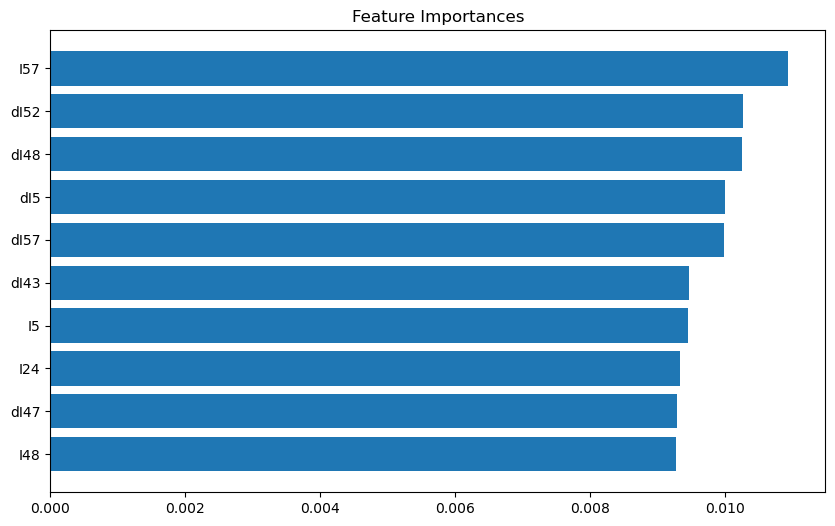

In [42]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is already loaded and the 'Group' column mapped
X = training_data.drop(columns=['Class', 'Perform'])  # Assuming 'Class' is the target
y = training_data['Class']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check new class distribution
print("After SMOTE, counts of label '1': {}".format(sum(y_train_smote == 1)))
print("After SMOTE, counts of label '-1': {}".format(sum(y_train_smote == -1)))
print("After SMOTE, counts of label '0': {}".format(sum(y_train_smote == 0)))

# Initialize the RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)  # n_estimators can be adjusted

# Train the model using the SMOTE-resampled training data
rf_clf.fit(X_train_smote, y_train_smote)

# Make predictions on the original (not resampled) test set
y_pred = rf_clf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Get feature importances
importances = rf_clf.feature_importances_

# Summarize feature importances in a DataFrame
features_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
features_df = features_df.sort_values(by='Importance', ascending=False)
print(features_df.head(10))  # Display top 10 features

# Optionally, plot feature importances
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(features_df['Feature'][:10], features_df['Importance'][:10])
plt.gca().invert_yaxis()  # Invert y-axis to have the most important at the top
plt.show()


Results for: All Features (Original + Composite)
              precision    recall  f1-score   support

          -1       0.42      0.41      0.41       388
           0       0.25      0.01      0.03       139
           1       0.52      0.66      0.59       512

    accuracy                           0.48      1039
   macro avg       0.40      0.36      0.34      1039
weighted avg       0.45      0.48      0.45      1039

Accuracy: 0.4821944177093359
    Feature  Importance
57      I57    0.010602
110    dI52    0.010324
63      dI5    0.010219
105    dI47    0.010160
116    dI58    0.010019
102    dI44    0.009970
114    dI56    0.009944
104    dI46    0.009933
86     dI28    0.009831
101    dI43    0.009815


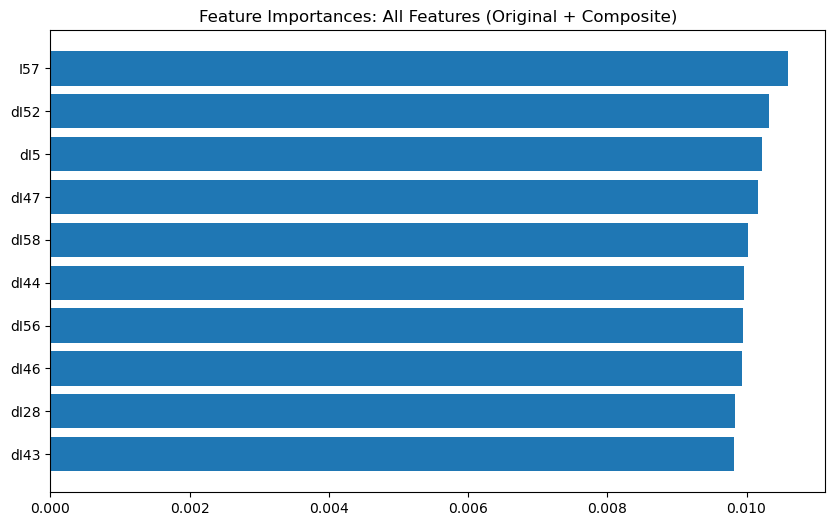

In [43]:
# Train with both original and new composite features
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(
    X, y, test_size=0.2, random_state=42)
train_and_evaluate(X_train_all, X_test_all, y_train_all, y_test_all, "All Features (Original + Composite)")
